# Mid_Term_Project_Submission_Final_Dup1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

In [4]:
# Loading the Train dataset

df_train=pd.read_csv('train.csv')
df_train_label=pd.read_csv('train_label.csv',header=None,names=['Target'])
df_train['Target']=df_train_label.Target

In [5]:
# Preparing the Test Dataset

df_test=pd.read_csv('test.csv')
df_test_label=pd.read_csv('test_label.csv',header=None,names=['Target'])
df_test['Target']=df_test_label.Target

In [6]:
#Checkling Missing Values - Train Data
miss=pd.DataFrame({'Col_name':df_train.columns,'Missing Value?':[any(df_train[x].isnull()) for x in df_train.columns],'Count_': [sum(df_train[y].isnull()) for y in df_train.columns],
                  'Percentage':[sum(df_train[y].isnull())/df_train.shape[0] for y in df_train.columns]})
miss.sort_values(by='Count_',ascending=False)

,Col_name,Missing Value?,Count_,Percentage
0,datetime,False,0,0.0
1,season,False,0,0.0
2,holiday,False,0,0.0
3,workingday,False,0,0.0
4,weather,False,0,0.0
5,temp,False,0,0.0
6,atemp,False,0,0.0
7,humidity,False,0,0.0
8,windspeed,False,0,0.0
9,Target,False,0,0.0


In [7]:
#Checkling Missing Values - Test Data
miss=pd.DataFrame({'Col_name':df_test.columns,'Missing Value?':[any(df_test[x].isnull()) for x in df_test.columns],'Count_': [sum(df_test[y].isnull()) for y in df_test.columns],
                  'Percentage':[sum(df_test[y].isnull())/df_test.shape[0] for y in df_test.columns]})
miss.sort_values(by='Count_',ascending=False)

,Col_name,Missing Value?,Count_,Percentage
0,datetime,False,0,0.0
1,season,False,0,0.0
2,holiday,False,0,0.0
3,workingday,False,0,0.0
4,weather,False,0,0.0
5,temp,False,0,0.0
6,atemp,False,0,0.0
7,humidity,False,0,0.0
8,windspeed,False,0,0.0
9,Target,False,0,0.0


In [8]:
df_train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target
count,8708,8708,8708.000000,8708.000000,8708,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
unique,8708,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,2/4/2012 15:00,Summer,NaN,NaN,Clear + Few clouds,NaN,NaN,NaN,NaN,NaN
freq,1,2197,NaN,NaN,5753,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.028480,0.680294,NaN,20.243020,23.655552,61.649173,12.843891,193.007005
std,NaN,NaN,0.166348,0.466389,NaN,7.813494,8.501107,19.199578,8.190314,181.552211
min,NaN,NaN,0.000000,0.000000,NaN,0.820000,0.760000,0.000000,0.000000,1.000000
25%,NaN,NaN,0.000000,0.000000,NaN,13.940000,16.665000,46.000000,7.001500,43.000000
50%,NaN,NaN,0.000000,1.000000,NaN,20.500000,24.240000,61.000000,12.998000,148.000000
75%,NaN,NaN,0.000000,1.000000,NaN,26.240000,31.060000,77.000000,16.997900,286.000000


* Inference - There is no null values in the train and test data.
* By descibing the train dataset we can infer that
    * holiday and workingday are havinig boolean values
    * weather - 4 Unique values
    * temp - avg temp 20.24 Deg, lowest 0.82 deg and max is 41 deg
    * atemp - feel like temperature, looks like variation is similar like temperature, need to be checked. 
    * humidity range from 0 to 100 % 
    * windspeed ranges from 0 to 57
    * Booking perday ranges from 1 to 977 

In [9]:
df_test.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target
count,2178,2178,2178.000000,2178.000000,2178,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
unique,2178,4,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,4/9/2011 21:00,Spring,NaN,NaN,Clear + Few clouds,NaN,NaN,NaN,NaN,NaN
freq,1,550,NaN,NaN,1439,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.028926,0.683196,NaN,20.182241,23.653214,62.835170,12.621496,185.845271
std,NaN,NaN,0.167636,0.465337,NaN,7.704978,8.369721,19.401161,8.060062,179.431987
min,NaN,NaN,0.000000,0.000000,NaN,3.280000,3.790000,0.000000,0.000000,1.000000
25%,NaN,NaN,0.000000,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,38.000000
50%,NaN,NaN,0.000000,1.000000,NaN,20.500000,24.240000,63.000000,11.001400,136.000000
75%,NaN,NaN,0.000000,1.000000,NaN,26.240000,31.060000,78.000000,16.997900,277.000000


* Inference - There is no null values in the train and test data.
* By descibing the train dataset we can infer that
    * holiday and workingday are havinig boolean values
    * weather - 3 Unique values
    * temp - avg temp 20.50 Deg, lowest 3.38 deg and max is 38.54 deg
    * atemp - feel like temperature, looks like variation is similar like temperature, need to be checked. 
    * humidity range from 0 to 100 % 
    * windspeed ranges from 0 to 57
    * Booking perday ranges from 1 to 901 

In [10]:
# Data Visualization - historgam 

def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=10,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+"Distribution",color='DarkRed')
        
    fig.tight_layout()
    plt.show()

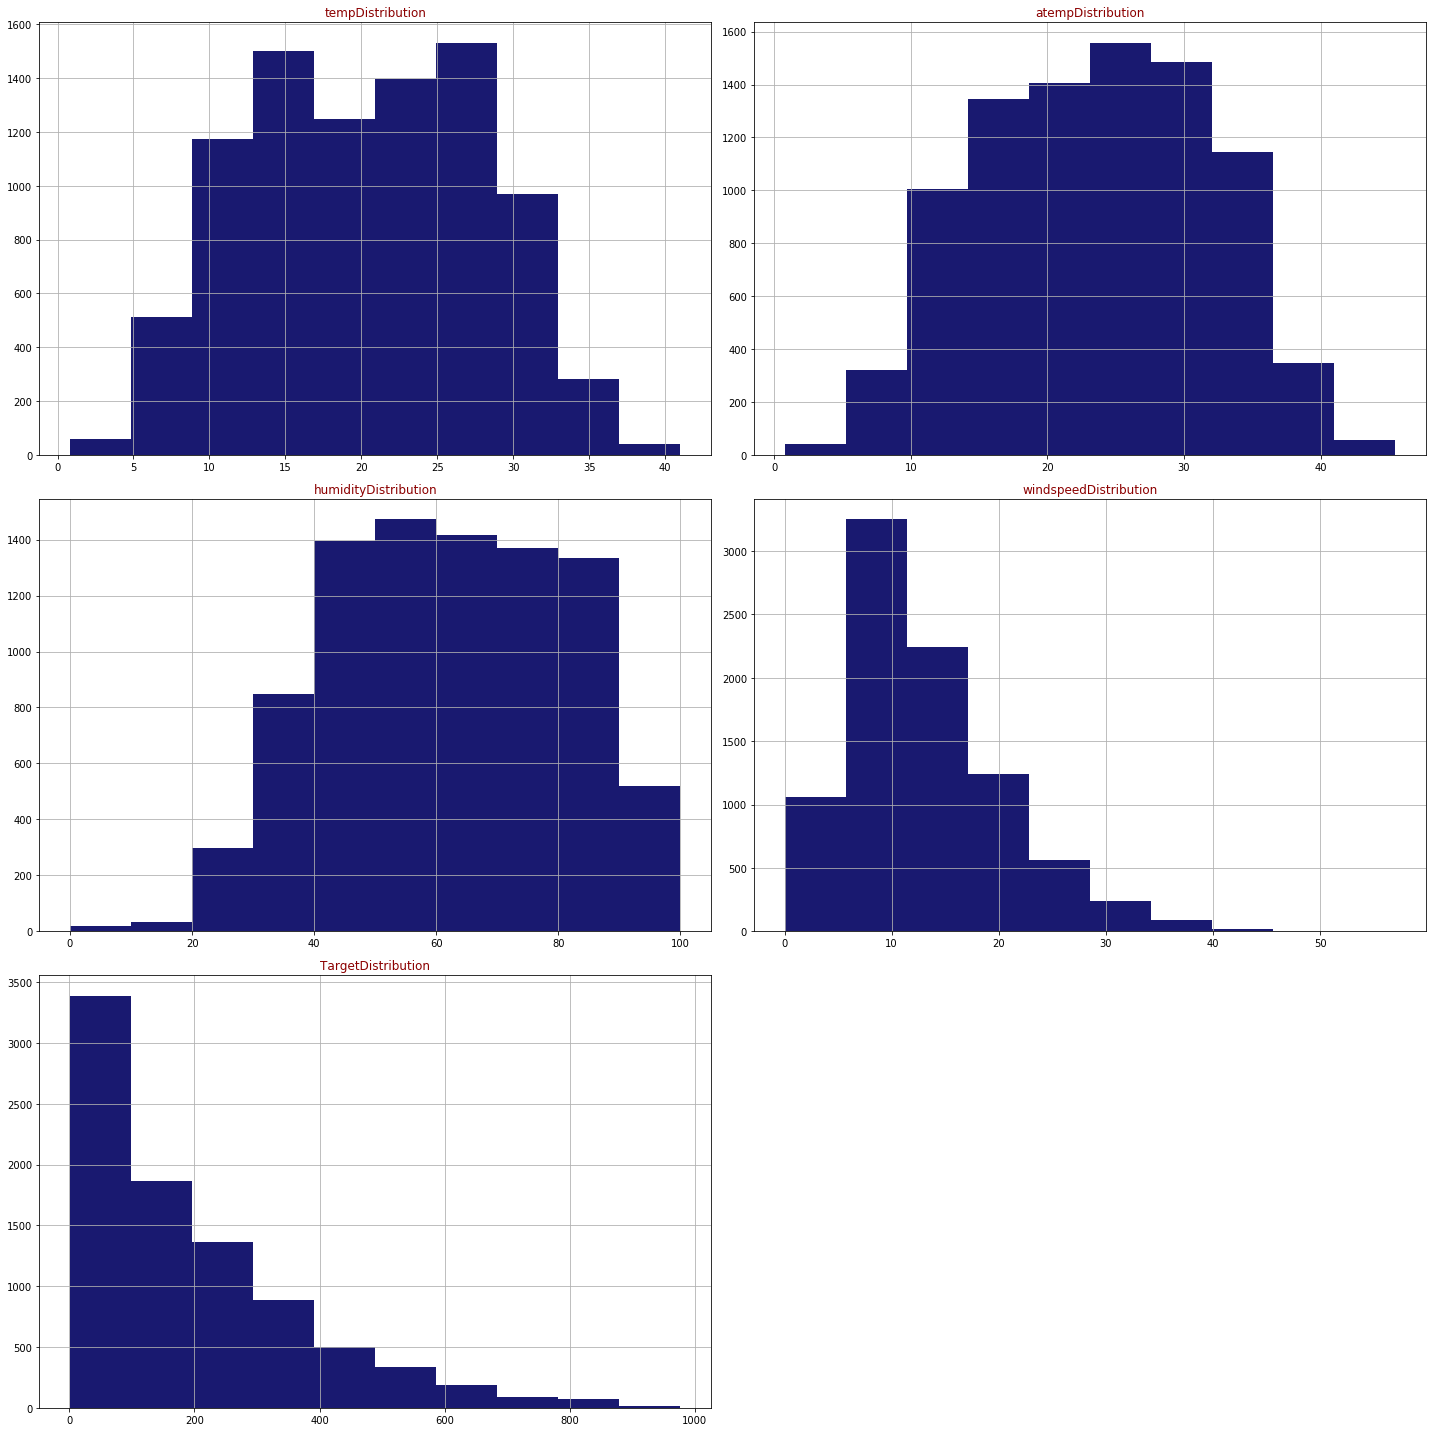

In [11]:
columns=['temp','atemp','humidity','windspeed','Target']
draw_histograms(df_train,columns,3,2)


# Inference
 * The continuous variables are selcted manually as the dataset in small and features are limited.
 * We can see that temp and atemp distribution both has two peaks.
 * Humidity distribution is some what normally distributed
 * Wind Speed - Not normally distributed. For values 5-6, there is no data.
 * No of Booking is Positively skewed.
 
 
 * All the features are not distributed normally, so we can take log of the values of the features and compare the lognormal values with the target distribution whihc is no.of booking

In [12]:
df_train['datetime']=pd.to_datetime(df_train['datetime'])

In [13]:
df_train['day']=df_train.datetime.dt.day
df_train['month']=df_train.datetime.dt.month
df_train['year']=df_train.datetime.dt.year
df_train['time']=df_train.datetime.dt.time
df_train['date']=df_train.datetime.dt.date

In [14]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,day,month,year,time,date
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2,5,2012,19:00:00,2012-05-02
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,5,9,2012,04:00:00,2012-09-05
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,13,1,2011,09:00:00,2011-01-13
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,18,11,2011,16:00:00,2011-11-18
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,9,2011,13:00:00,2011-09-13


* when its not a holiday and not a working day, it can be considered to a weekend. Introducing that feature to the dataframe.

In [18]:
df_train['weekend']=1-(df_train.holiday +df_train.workingday)

In [19]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,day,month,year,time,date,weekend
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2,5,2012,19:00:00,2012-05-02,0
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,5,9,2012,04:00:00,2012-09-05,0
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,13,1,2011,09:00:00,2011-01-13,0
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,18,11,2011,16:00:00,2011-11-18,0
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,9,2011,13:00:00,2011-09-13,0


In [20]:
df_train.weekend.value_counts()

0    6172
1    2536
Name: weekend, dtype: int64

# Checking for the outliers

In [21]:
# Calculating IQR score for all the columns

Q1=df_train.quantile(0.25)
Q3=df_train.quantile(0.75)
IQR=Q3-Q1
print(IQR)

holiday         0.0000
workingday      1.0000
temp           12.3000
atemp          14.3950
humidity       31.0000
windspeed       9.9964
Target        243.0000
day            10.0000
month           6.0000
year            1.0000
weekend         1.0000
dtype: float64


In [22]:
feat=['temp','atemp','humidity','windspeed','Target']

X=df_train[feat]


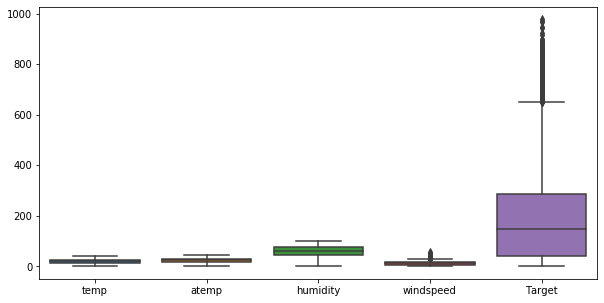

In [23]:
#Plotting the box plot
plt.figure(figsize=(10,5))
sns.boxplot(data=X)
plt.xticks(ticks=np.arange(len(feat)),labels=feat)
plt.show()

In [31]:
IQR.Target

holiday         0.0000
workingday      1.0000
temp           12.3000
atemp          14.3950
humidity       31.0000
windspeed       9.9964
Target        243.0000
day            10.0000
month           6.0000
year            1.0000
weekend         1.0000
dtype: float64

# Inference - Outlier

* From the above we can see that for, temp,atemp and humidity there is not outlier.
* For windspeed there are outlier - need to understand the relation between these outlier values and booking with those between IQR in order to take decision whether to discard them or not.
* Target or Booking is being observed to have considerable number of outliers.

In [34]:
X_outl_index=df_train[((df_train.Target<(Q1.Target-1.5*IQR.Target)) | (df_train.Target>(Q3.Target+1.5*IQR.Target)))].index
X_wo_outl_index=df_train[~((df_train.Target<(Q1.Target-1.5*IQR.Target)) | (df_train.Target>(Q3.Target+1.5*IQR.Target)))].index

In [35]:
X_outl_index.shape

(242,)

In [47]:
df_outlier=df_train.loc[X_outl_index]
df_not_outlier=df_train.loc[X_wo_outl_index]

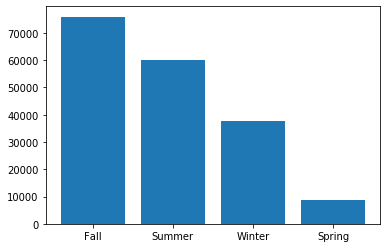

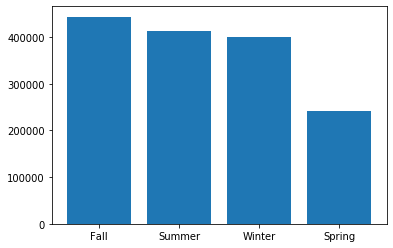

In [54]:
#Season
season_grp_out=df_outlier.groupby('season')['Target'].sum().sort_values(ascending=False)
plt.bar(season_grp_out.index,season_grp_out.values)
plt.show()
season_grp_not_out=df_not_outlier.groupby('season')['Target'].sum().sort_values(ascending=False)
plt.bar(season_grp_not_out.index,season_grp_not_out.values)
plt.show()


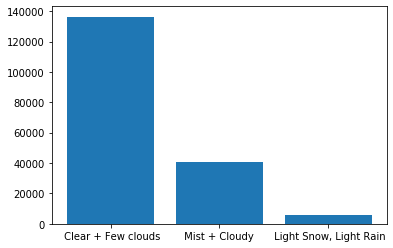

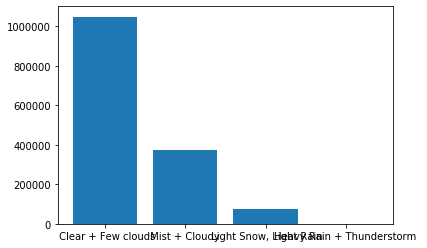

In [55]:
#Weather
weather_grp_out=df_outlier.groupby('weather')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(weather_grp_out.index,weather_grp_out.values)
plt.show()

weather_grp_not_out=df_not_outlier.groupby('weather')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(weather_grp_not_out.index,weather_grp_not_out.values)
plt.show()


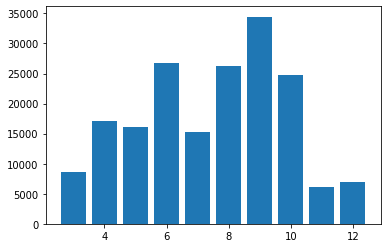

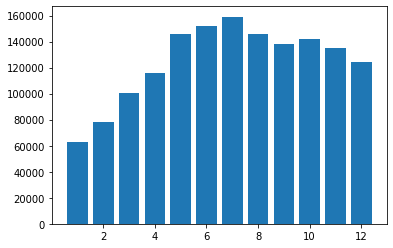

In [56]:
#Month
month_grp_out=df_outlier.groupby('month')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(month_grp_out.index,month_grp_out.values)
plt.show()

month_grp_not_out=df_not_outlier.groupby('month')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(month_grp_not_out.index,month_grp_not_out.values)
plt.show()


C:\Users\jbhsm\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


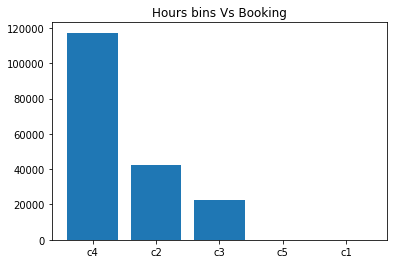

C:\Users\jbhsm\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


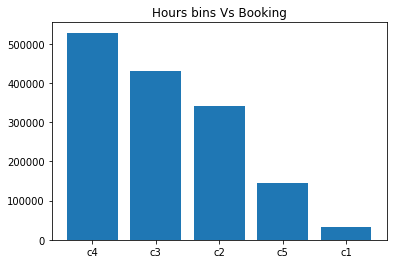

In [57]:
df_temp=df_outlier[['Target','time']]
df_temp['time_bins']=pd.cut(x=pd.to_datetime(df_outlier.datetime).dt.hour,bins=[0,5,10,15,20,24],labels=['c1','c2','c3','c4','c5'])
time_grp=df_temp.groupby('time_bins')['Target'].sum().sort_values(ascending=False)
plt.bar(time_grp.index,time_grp.values)
plt.xticks(time_grp.index)
plt.title("Hours bins Vs Booking")
plt.show()

df_temp_1=df_not_outlier[['Target','time']]
df_temp_1['time_bins']=pd.cut(x=pd.to_datetime(df_not_outlier.datetime).dt.hour,bins=[0,5,10,15,20,24],labels=['c1','c2','c3','c4','c5'])
time_grp=df_temp_1.groupby('time_bins')['Target'].sum().sort_values(ascending=False)
plt.bar(time_grp.index,time_grp.values)
plt.xticks(time_grp.index)
plt.title("Hours bins Vs Booking")
plt.show()




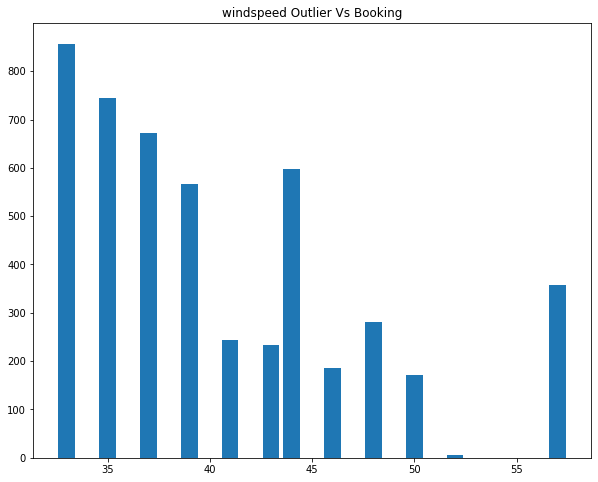

In [20]:
plt.figure(figsize=(10,8))
plt.bar(X.iloc[X_outl_index].windspeed,df_train.loc[X_outl_index].Target)
plt.title("windspeed Outlier Vs Booking")
plt.show()

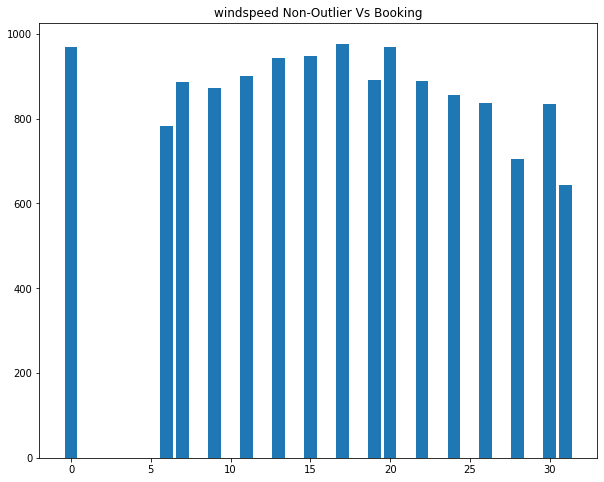

In [24]:
plt.figure(figsize=(10,8))
plt.bar(X.iloc[X_wo_outl_index].windspeed,df_train.loc[X_wo_outl_index].Target)
plt.title("windspeed Non-Outlier Vs Booking")
plt.show()

# Inference - Outlier 2

    * There are total 182 outlier values.
    * With windspeed between 0-30, booking is almost constant. As wind speed increases more than 33, booking decreases. This clearly shows that even outlier carries some information about the booking and may not be excluded.
    

In [47]:
# df_temp_log=df_train[['temp','atemp','humidity','windspeed','Target']]

In [46]:
# df_temp_log.atemp=np.log(df_temp_log.atemp)
# df_temp_log.temp=np.log(df_temp_log.temp)
# df_temp_log.humidity=np.log(df_temp_log.humidity)
# df_temp_log.windspeed=np.log(df_temp_log.windspeed)

In [45]:
# df_temp_log.head()

In [44]:
# columns=['temp','atemp','humidity','windspeed','Target']
# draw_histograms(df_temp_log,columns,3,2)

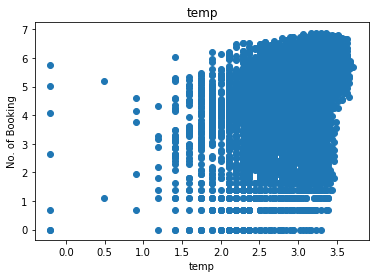

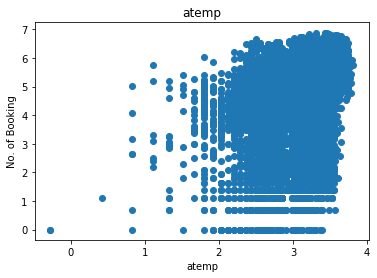

C:\Users\jbhsm\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


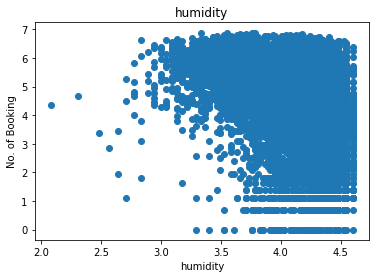

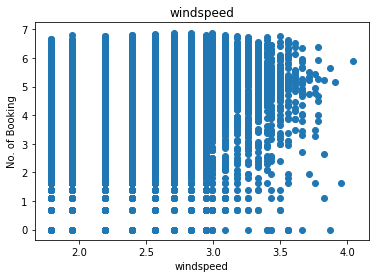

In [21]:
data=df_train.copy()
columns1=['temp','atemp','humidity','windspeed']
data.Target=np.log(data.Target)
for feature in columns1:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['Target'])
        plt.xlabel(feature)
        plt.ylabel('No. of Booking')
        plt.title(feature)
        plt.show()

# Inference
    * From the above graph we can infer that at lower temperature and humidity we do not see much booking
    * windspeed does not have significant impact on the booking, there is slight trend of decrease in booking when wind speed in very high.

# Understanding the varition of features with respect to the target variable

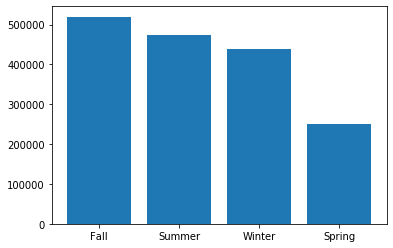

In [22]:
season_grp=df_train.groupby('season')['Target'].sum().sort_values(ascending=False)
plt.bar(season_grp.index,season_grp.values)
plt.show()

* Maximum booking is in Fall followed by Summer, winter and Spring

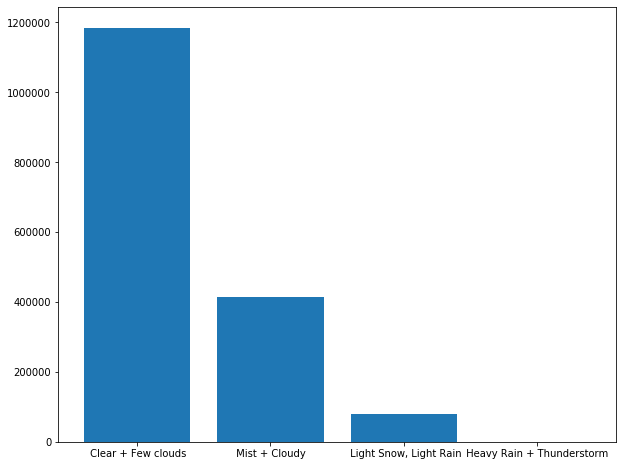

In [23]:
weather_grp=df_train.groupby('weather')['Target'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.bar(weather_grp.index,weather_grp.values)
plt.show()

* Max booking is observed for clear+Few Clouds
* No booking observed for Heavy Rain+Thunderstorm - the model will not be trained w.r.t to this.

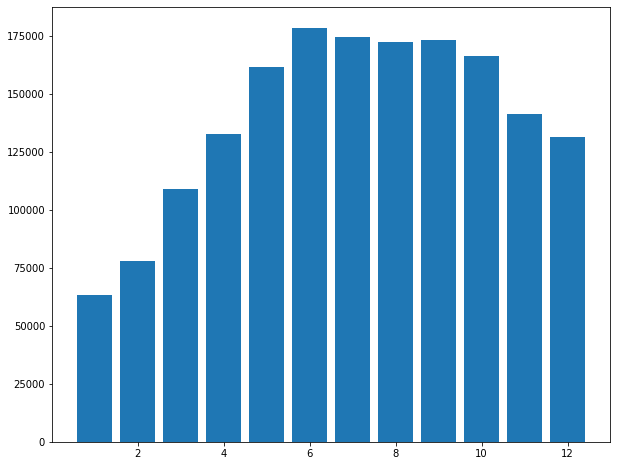

In [24]:
month_grp=df_train.groupby('month')['Target'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.bar(month_grp.index,month_grp.values)
plt.show()

* Highest booking is observed in the month of June, followed by July, August and September
* Booking reduces in the winter months november onwards, being lowest in January, then gradually increases.

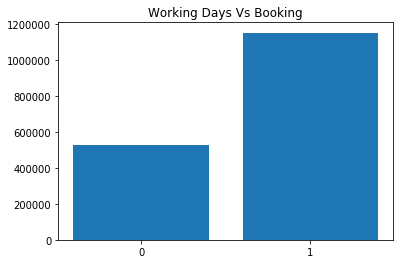

In [25]:
wrk_day_grp=df_train.groupby('workingday')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(wrk_day_grp.index,wrk_day_grp.values)
plt.xticks(wrk_day_grp.index)
plt.title("Working Days Vs Booking")
plt.show()

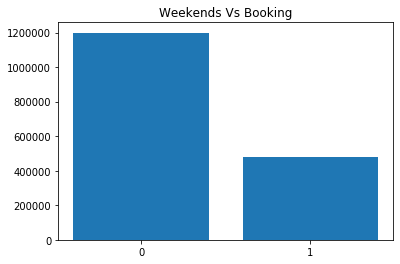

In [26]:
wk_end_grp=df_train.groupby('weekend')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(wk_end_grp.index,wk_end_grp.values)
plt.xticks(wk_end_grp.index)
plt.title("Weekends Vs Booking")
plt.show()

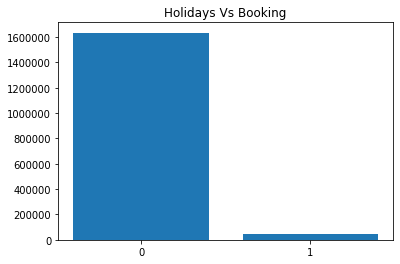

In [27]:
hol_grp=df_train.groupby('holiday')['Target'].sum().sort_values(ascending=False)
# plt.figure(figsize=(10,8))
plt.bar(hol_grp.index,hol_grp.values)
plt.xticks(hol_grp.index)
plt.title("Holidays Vs Booking")
plt.show()

* Max booking are taking place on working days, followed by weekends and Holidays

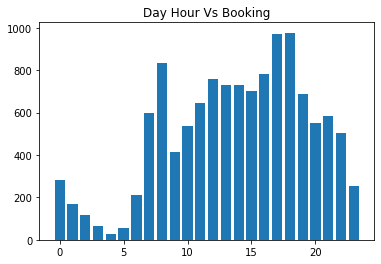

In [28]:
plt.bar(df_train.datetime.dt.hour,df_train.Target)
# plt.xticks(hol_grp.index)
plt.title("Day Hour Vs Booking")
plt.show()

* From the above, we can see that in early hours of the day, booking is low.
* Two signicant peaks are observed, one near 7:00 to 8:00 hours and other 17:00 and 18:00 hours
* A steady booking is observed 10:00-1500 hours

In [29]:
# Creating time bins basis the above observations and understanding its variations with respect to booking
df_temp=df_train[['Target','time']]

In [30]:
df_temp['time_bins']=pd.cut(x=pd.to_datetime(df_train.datetime).dt.hour,bins=[0,5,10,15,20,24],labels=['c1','c2','c3','c4','c5'])

C:\Users\jbhsm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


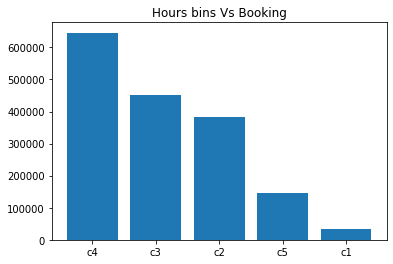

In [31]:
time_grp=df_temp.groupby('time_bins')['Target'].sum().sort_values(ascending=False)
plt.bar(time_grp.index,time_grp.values)
plt.xticks(time_grp.index)
plt.title("Hours bins Vs Booking")
plt.show()

In [60]:
print(time_grp)
print(time_grp.std())

time_bins
c4    645719
c3    452946
c2    382720
c5    145898
c1     33749
Name: Target, dtype: int64
244544.20084986681


In [58]:
# Introducing the bins in the training dataset
df_train['time_bins']=pd.cut(x=pd.to_datetime(df_train.datetime).dt.hour,bins=[0,5,10,15,20,24],labels=['c1','c2','c3','c4','c5'])


In [33]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,day,month,year,time,date,weekend,time_bins
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,2,5,2012,19:00:00,2012-05-02,0,c4
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,5,9,2012,04:00:00,2012-09-05,0,c1
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,13,1,2011,09:00:00,2011-01-13,0,c2
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,18,11,2011,16:00:00,2011-11-18,0,c4
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,9,2011,13:00:00,2011-09-13,0,c3


* From the above table:
    * feature "datetime" and "date" are repetative and are having unique values and may be dropped.
    * The feature "day" - the impact of it is captured thru 3 features Holiday, Working day and week end, hence may be dropped.
    * Feature "Time" - Its impact is captured thru the time_bin feature, hence also may dropped.

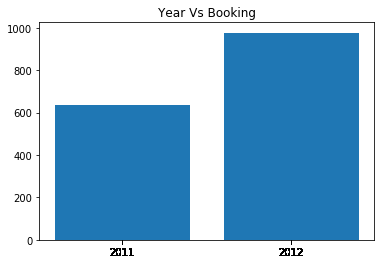

In [34]:
plt.bar(df_train.datetime.dt.year,df_train.Target)
plt.xticks(df_train.datetime.dt.year)
plt.title("Year Vs Booking")
plt.show()

In [35]:
df_train.datetime.dt.year.value_counts()

2012    4399
2011    4309
Name: datetime, dtype: int64

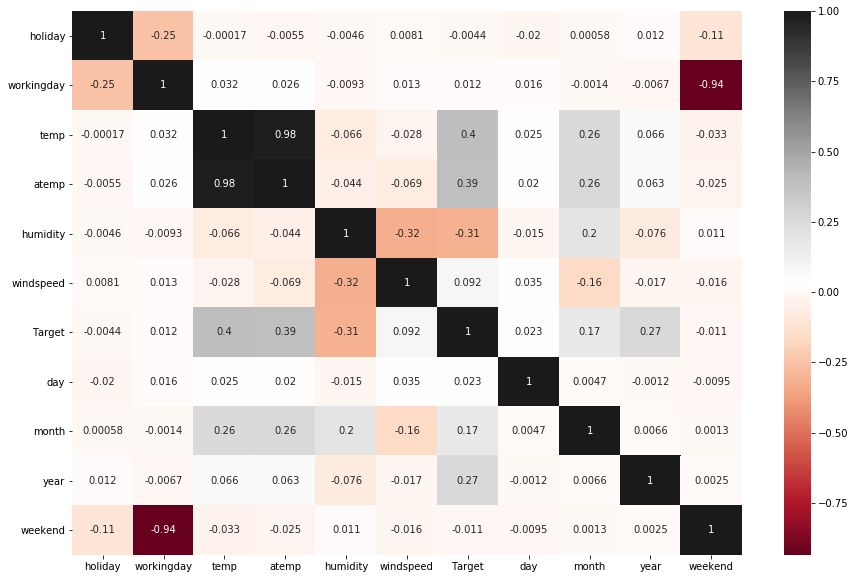

In [59]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, cmap='RdGy')
plt.show()

# Inference Co-relation plot
    * Holiday - Low negative impact on the no.of booking
    * there is significant correlation between no. of booking and temp and atemp. Both being equal to 0.4. One can be considered for dropping.

In [92]:
# Creating the final training data set

train_X=df_train.drop(["datetime","date","day","time",'temp','Target'],axis=1)


In [93]:
df_outlier_X.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,month,year,weekend,time_bins
5,Fall,0,1,Clear + Few clouds,12.120,36,22.0028,8,2012,0,c4
27,Summer,0,1,Clear + Few clouds,26.515,73,15.0013,5,2012,0,c4
30,Fall,0,1,Clear + Few clouds,35.605,49,12.9980,7,2012,0,c4
52,Summer,0,1,Clear + Few clouds,31.060,43,12.9980,6,2012,0,c4
70,Summer,0,1,Clear + Few clouds,31.060,38,15.0013,5,2012,0,c4


In [94]:
train_X=train_X[['season','weather','time_bins','year','holiday','workingday','weekend','atemp','humidity','windspeed','month']]


In [95]:
train_X.head()

,season,weather,time_bins,year,holiday,workingday,weekend,atemp,humidity,windspeed,month
0,Summer,Clear + Few clouds,c4,2012,0,1,0,25.760,77,16.9979,5
1,Fall,Clear + Few clouds,c1,2012,0,1,0,33.335,79,19.0012,9
2,Spring,Clear + Few clouds,c2,2011,0,1,0,6.060,50,22.0028,1
3,Winter,Clear + Few clouds,c4,2011,0,1,0,16.665,29,8.9981,11
4,Fall,Clear + Few clouds,c3,2011,0,1,0,33.335,51,19.0012,9


In [96]:
# Preparing the test dataset.
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,day,month,year,time,date,weekend,time_bins
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,10,5,2012,11:00:00,2012-05-10,0,c3
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,9,6,2012,07:00:00,2012-06-09,1,c2
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,6,3,2011,20:00:00,2011-03-06,1,c4
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,13,10,2011,11:00:00,2011-10-13,0,c3
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2,6,2012,12:00:00,2012-06-02,1,c3


In [97]:
df_test['datetime']=pd.to_datetime(df_test['datetime'])

In [98]:
df_test['day']=df_test.datetime.dt.day
df_test['month']=df_test.datetime.dt.month
df_test['year']=df_test.datetime.dt.year
df_test['time']=df_test.datetime.dt.time
df_test['date']=df_test.datetime.dt.date

In [99]:
df_test['weekend']=1-(df_test.holiday +df_test.workingday)

In [100]:
df_test['time_bins']=pd.cut(x=pd.to_datetime(df_test.datetime).dt.hour,bins=[0,5,10,15,20,24],labels=['c1','c2','c3','c4','c5'])

In [101]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Target,day,month,year,time,date,weekend,time_bins
0,2012-05-10 11:00:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,10,5,2012,11:00:00,2012-05-10,0,c3
1,2012-06-09 07:00:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,9,6,2012,07:00:00,2012-06-09,1,c2
2,2011-03-06 20:00:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,6,3,2011,20:00:00,2011-03-06,1,c4
3,2011-10-13 11:00:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,13,10,2011,11:00:00,2011-10-13,0,c3
4,2012-06-02 12:00:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,2,6,2012,12:00:00,2012-06-02,1,c3


In [102]:
# Creating the final test data set

test_X=df_test.drop(["datetime","date","day","time",'temp','Target'],axis=1)

In [103]:
test_X=test_X[['season','weather','time_bins','year','holiday','workingday','weekend','atemp','humidity','windspeed','month']]

In [104]:
test_X

,season,weather,time_bins,year,holiday,workingday,weekend,atemp,humidity,windspeed,month
0,Summer,Clear + Few clouds,c3,2012,0,1,0,25.000,48,35.0008,5
1,Summer,Clear + Few clouds,c2,2012,0,0,1,27.275,64,7.0015,6
2,Spring,"Light Snow, Light Rain",c4,2011,0,0,1,12.120,100,27.9993,3
3,Winter,Mist + Cloudy,c3,2011,0,1,0,28.790,83,0.0000,10
4,Summer,Clear + Few clouds,c3,2012,0,0,1,31.060,43,23.9994,6
...,...,...,...,...,...,...,...,...,...,...,...
2173,Spring,Clear + Few clouds,c1,2012,0,1,0,22.725,63,26.0027,3
2174,Spring,Mist + Cloudy,c3,2012,0,1,0,17.425,81,7.0015,1
2175,Spring,Clear + Few clouds,c5,2012,0,1,0,22.725,59,19.9995,3
2176,Summer,Clear + Few clouds,c1,2011,0,1,0,21.210,94,8.9981,5


* Categorical values in both train and test dataset need to converted to their respective dummy values

In [105]:
train_X_dum=pd.get_dummies(data=train_X,columns=['month','season','weather','time_bins','year'])

In [106]:
train_X_dum.head()

,holiday,workingday,weekend,atemp,humidity,windspeed,month_1,month_2,month_3,month_4,...,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,time_bins_c1,time_bins_c2,time_bins_c3,time_bins_c4,time_bins_c5,year_2011,year_2012
0,0,1,0,25.760,77,16.9979,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,33.335,79,19.0012,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,6.060,50,22.0028,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,16.665,29,8.9981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,33.335,51,19.0012,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [107]:
train_X_dum.columns

Index(['holiday', 'workingday', 'weekend', 'atemp', 'humidity', 'windspeed',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'time_bins_c1', 'time_bins_c2', 'time_bins_c3', 'time_bins_c4',
       'time_bins_c5', 'year_2011', 'year_2012'],
      dtype='object')

In [108]:
# applying min_max scaler to the data set
from sklearn.preprocessing import MinMaxScaler
df_temp=train_X_dum[['atemp','humidity','windspeed']]
min_max=MinMaxScaler()
trfd_array = min_max.fit_transform(df_temp)



In [109]:
trfd_array

array([[0.55934668, 0.77      , 0.29822499],
       [0.72882873, 0.79      , 0.33337252],
       [0.1185815 , 0.5       , 0.38603503],
       ...,
       [0.59324309, 0.56      , 0.15786999],
       [0.28806354, 0.61      , 0.29822499],
       [0.1185815 , 0.5       , 0.3508875 ]])

In [110]:
train_X_dum['atemp']=trfd_array[:,0]
train_X_dum['humidity']=trfd_array[:,1]
train_X_dum['windspeed']=trfd_array[:,2]


In [90]:
train_X_dum.head()

,holiday,workingday,weekend,atemp,humidity,windspeed,month_1,month_2,month_3,month_4,...,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,time_bins_c1,time_bins_c2,time_bins_c3,time_bins_c4,time_bins_c5,year_2011,year_2012
0,0,1,0,0.559347,0.77,0.298225,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0.728829,0.79,0.333373,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0.118581,0.50,0.386035,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,0,0.355856,0.29,0.157870,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0.728829,0.51,0.333373,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [111]:
train_y=df_train.Target

In [112]:
test_X_dum=pd.get_dummies(data=test_X,columns=['month','season','weather','time_bins','year'])

In [113]:
test_X_dum.head()

,holiday,workingday,weekend,atemp,humidity,windspeed,month_1,month_2,month_3,month_4,...,weather_ Clear + Few clouds,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,time_bins_c1,time_bins_c2,time_bins_c3,time_bins_c4,time_bins_c5,year_2011,year_2012
0,0,1,0,25.000,48,35.0008,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,0,0,1,27.275,64,7.0015,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,12.120,100,27.9993,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,28.790,83,0.0000,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0,0,1,31.060,43,23.9994,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [115]:
# Processing temperature, humidity and windspeed for test data
df_temp_test=test_X_dum[['atemp','humidity','windspeed']]
min_max_test=MinMaxScaler()
trfd_array_test = min_max_test.fit_transform(df_temp_test)

In [116]:
test_X_dum['atemp']=trfd_array_test[:,0]
test_X_dum['humidity']=trfd_array_test[:,1]
test_X_dum['windspeed']=trfd_array_test[:,2]

In [117]:
test_X_dum.columns

Index(['holiday', 'workingday', 'weekend', 'atemp', 'humidity', 'windspeed',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ', 'time_bins_c1', 'time_bins_c2',
       'time_bins_c3', 'time_bins_c4', 'time_bins_c5', 'year_2011',
       'year_2012'],
      dtype='object')

In [118]:
train_X_dum.columns


Index(['holiday', 'workingday', 'weekend', 'atemp', 'humidity', 'windspeed',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'time_bins_c1', 'time_bins_c2', 'time_bins_c3', 'time_bins_c4',
       'time_bins_c5', 'year_2011', 'year_2012'],
      dtype='object')

In [129]:
columns_drop_train=['holiday','month_1','season_Fall','weather_ Heavy Rain + Thunderstorm ','time_bins_c1','year_2011']

In [131]:
# Removing 'weather_ Heavy Rain + Thunderstorm' column from the train dataset - 
# as there is not data of no.of booking against this feature.

#Also removing one column after application of dummy
train_X_final=train_X_dum.drop(columns_drop_train, axis=1)

In [120]:
# removing the requisite columns from test data set - this will decrease the muilti-coliniearity
columns_drop_test=['holiday','month_1','season_Fall','time_bins_c1','year_2011']
test_X_final=test_X_dum.drop(columns_drop_test, axis=1)

In [121]:
test_y=df_test.Target

In [132]:
train_X_out=train_X_final.loc[X_outl_index]
train_X_n_out=train_X_final.loc[X_wo_outl_index]

In [133]:
train_y_out=df_train.loc[X_outl_index].Target
train_y_n_out=df_train.loc[X_wo_outl_index].Target

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [146]:
params_reg = {'n_estimators':[100,200,300],'criterion': ['mse'],'max_depth':[5,6],'min_samples_split':[5,10],
              'min_samples_leaf':[5,10]}
                     
            

In [138]:
clf=RandomForestRegressor(random_state=0)

In [139]:
clf1=GradientBoostingRegressor(random_state=0)

In [147]:
grid_obj = GridSearchCV(clf,params_reg)

In [148]:
grid_obj.fit(train_X_n_out,train_y_n_out)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [149]:
grid_obj.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
grid_obj.best_score_

In [ ]:
grid_results=pd.DataFrame(grid_obj.cv_results_)

In [ ]:
grid_results.sort_values('rank_test_score',ascending=True).head()

In [ ]:
grid_results.params[0]

In [ ]:
grid_obj.cv_results_['params']

In [150]:
clf_best=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [151]:
clf_best.fit(train_X_n_out,train_y_n_out)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [152]:
y_pred=clf_best.predict(test_X_final)

In [153]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [154]:
score=mean_absolute_error(test_y,y_pred)
score_mse=mean_squared_error(test_y,y_pred)

In [155]:
score

61.44777134745011

In [156]:
score_mse

9270.654246757893

In [157]:
grid_obj.fit(train_X_final,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [158]:
grid_obj.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [185]:
clf_best_1=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [186]:
clf_best_1.fit(train_X_final,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [187]:
y_pred_1=clf_best_1.predict(test_X_final)

In [188]:
score_1=mean_absolute_error(test_y,y_pred_1)
score_mse_1=mean_squared_error(test_y,y_pred_1)

In [189]:
score_1,score_mse_1

(56.65814791673553, 7733.597158659916)

In [ ]:
clf_grad_boost=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf_grad_boost.fit(train_X_final,train_y)

In [ ]:
y_pred_grad=clf_grad_boost.predict(test_X_final)

In [ ]:
score_grad_mae=mean_absolute_error(test_y,y_pred_grad)
score_grad_mse=mean_squared_error(test_y,y_pred_grad)

In [ ]:
score_grad_mae

In [ ]:
score_grad_mse

In [ ]:
fig=plt.figure(figsize=(30,10))
plt.plot(test_y[0:300], label='Actual_y',color='r')
plt.plot(y_pred_grad[0:300], label='Grd_bst_y',color='g')
# plt.xticks(range(0,300))
plt.legend()
# plt.title("Year Vs Booking")
plt.show()

In [ ]:
dict_temp={}
dict_temp['actual']=test_y
dict_temp['predicted']=y_pred_grad

In [ ]:
predict_df=pd.DataFrame(dict_temp)

In [ ]:
predict_df.head()

In [ ]:
predict_df["pred_type"]=predict_df.actual-predict_df.predicted

In [ ]:
predict_df.head()

In [ ]:
predict_df['pred_bias']=predict_df.pred_type.tolist()

In [ ]:
predict_df['pred_bias']=predict_df['pred_bias'].map(lambda x: 'Over' if x<0 else 'Under')

In [ ]:
predict_df.head()

In [ ]:
predict_df.pred_bias.value_counts()

In [ ]:
predict_df['percent_pred']= round(((np.absolute(predict_df.pred_type)/predict_df.actual)*100),2)

In [ ]:
predict_df.head()

In [ ]:
predict_df['book_bins']=pd.cut(x=predict_df.actual,bins=[0,200,400,600,800,1000])

In [ ]:
# 0 - Under estimation
# 1 - Over Estimation

In [ ]:
predict_df.head()

In [ ]:

book_bin_grp=predict_df[predict_df.pred_bias=='Over'].groupby('book_bins')['percent_pred'].mean()

In [ ]:
book_bin_grp

In [ ]:
book_bin_grp=predict_df[predict_df.pred_bias=='Under'].groupby('book_bins')['percent_pred'].mean()

In [ ]:
book_bin_grp

In [ ]:
book_bin_grp.index[0]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(train_X_dum,train_y)

In [ ]:
y_pred_lr=lr.predict(test_X_dum)

In [ ]:
score_lr_mae=mean_absolute_error(test_y,y_pred_lr)
score_lr_mse=mean_squared_error(test_y,y_pred_lr)

In [ ]:
score_lr_mae

In [ ]:
score_lr_mse

In [ ]:
lr.summary

In [ ]:
data_temp=df_train.copy()

In [ ]:
data_temp.head()

In [ ]:
data_temp['book_bins']=pd.cut(x=data_temp.Target,bins=[0,200,400,600,800,1000])

In [ ]:
book_bin_grp_1=data_temp.groupby('book_bins')['Target'].count()

In [ ]:
book_bin_grp_1

In [ ]:
data_temp.shape

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(train_y,train_X_dum)

In [ ]:
results = model.fit()

In [ ]:
results.params

In [ ]:
results.summary()

In [ ]:
train_X_check=train_X_dum.copy()
test_X_check=test_X_dum.copy()

In [ ]:
train_X_check.corr()

In [ ]:
train_X_check.drop(['workingday','weekend'],axis=1,inplace=True)

In [ ]:
test_X_check.drop(['workingday','weekend'],axis=1,inplace=True)

In [ ]:
model = sm.OLS(train_y,train_X_check)

In [ ]:
results = model.fit()

In [ ]:
results.params

In [ ]:
results.summary()

In [ ]:
clf_best.fit(train_X_check,train_y)

In [ ]:
y_pred_check=clf_best.predict(test_X_check)

In [ ]:
score_chk_mae=mean_absolute_error(test_y,y_pred_check)
score_chk_mse=mean_squared_error(test_y,y_pred_check)

In [ ]:
score_chk_mae

In [ ]:
score_chk_mse